In [76]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Train_SU63ISt.csv')
data.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [66]:
import pandas as pd
data = pd.read_csv('Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [67]:
import pandas as pd
data = pd.read_csv('Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['year']=data['Datetime'].dt.year 
data['month']=data['Datetime'].dt.month 
data['day']=data['Datetime'].dt.day

data['dayofweek_num']=data['Datetime'].dt.dayofweek  
data['dayofweek_name']=data['Datetime'].dt.day_name()

data.head()

,ID,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name
0,0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday
1,1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday
2,2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday
3,3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday
4,4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday


In [68]:
data['Hour'] = data['Datetime'].dt.hour 
data['minute'] = data['Datetime'].dt.minute 

data.head()

,ID,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name,Hour,minute
0,0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday,0,0
1,1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday,1,0
2,2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday,2,0
3,3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday,3,0
4,4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday,4,0


In [80]:
for i in range(1,24):
    lag = 'lag_' + str(i)
    data[lag] = data['Count'].shift(i)
data.head()

#data = data[['Hour', 'month', 'year','day', 'dayofweek_num', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Count']]
#data.head(10)

,ID,Datetime,Count,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
0,0,25-08-2012 00:00,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,25-08-2012 01:00,2,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,25-08-2012 02:00,6,2.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,25-08-2012 03:00,2,6.0,2.0,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,25-08-2012 04:00,2,2.0,6.0,2.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data_1 = data.dropna()
corr_matrix = data_1.corr()

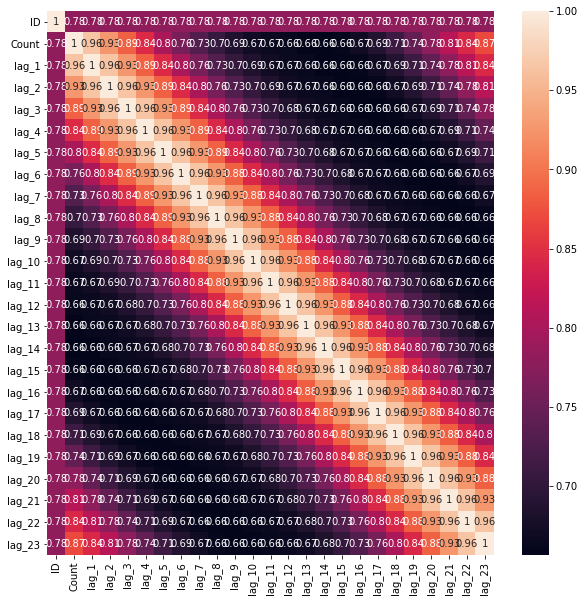

In [83]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, ax=ax)

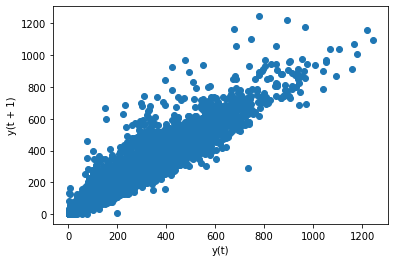

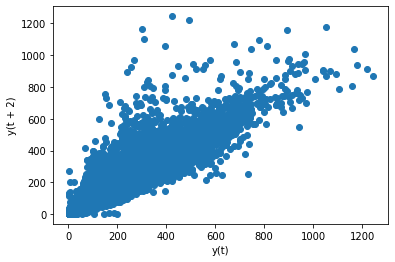

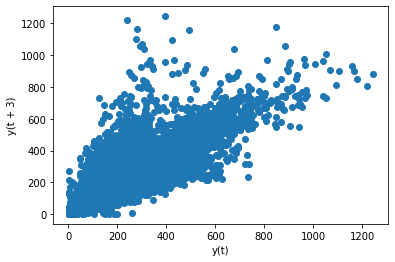

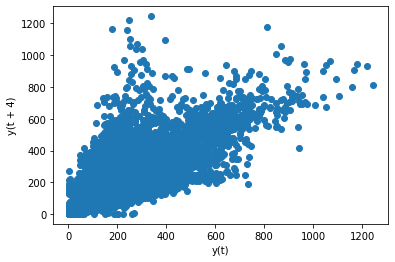

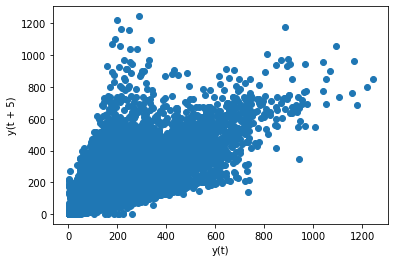

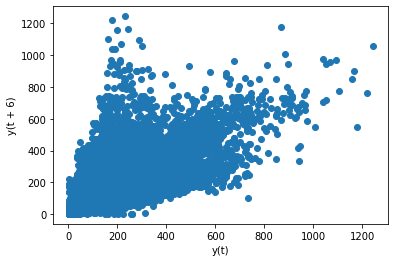

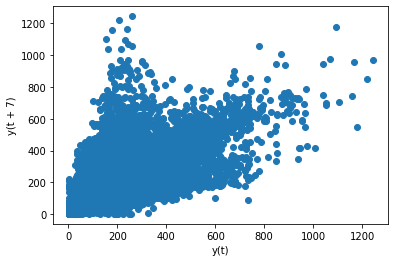

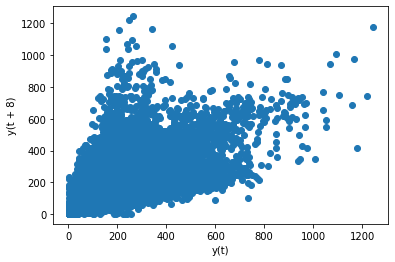

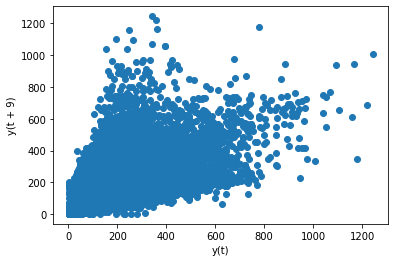

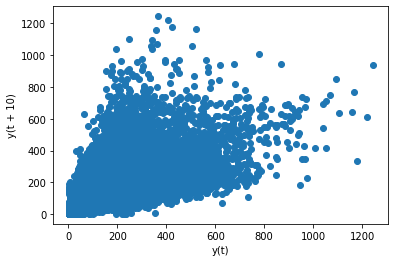

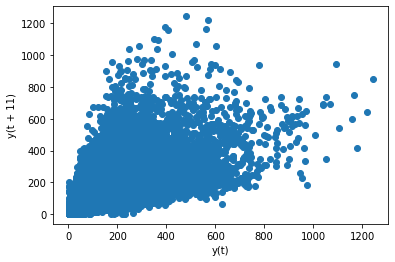

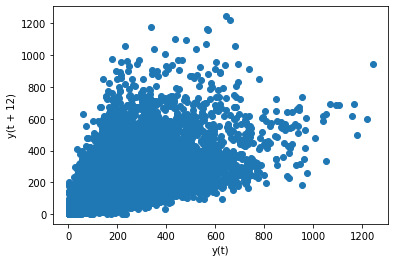

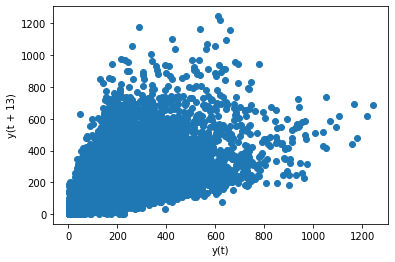

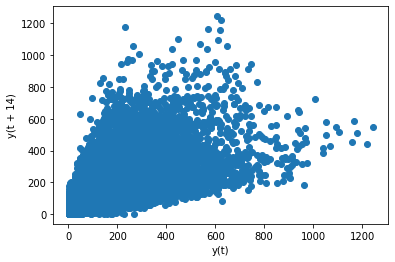

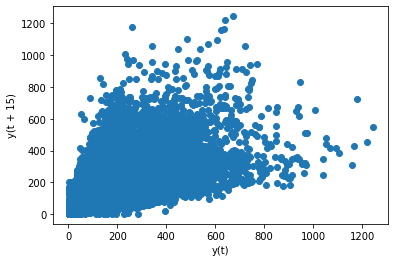

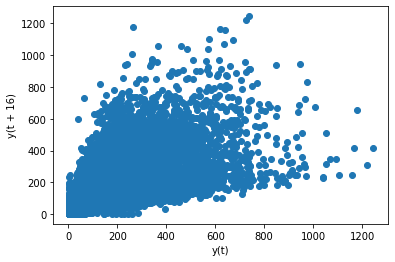

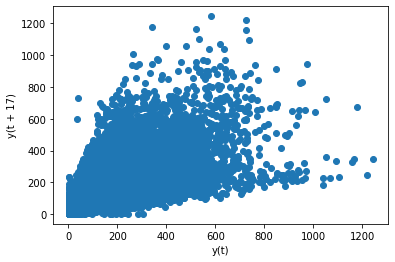

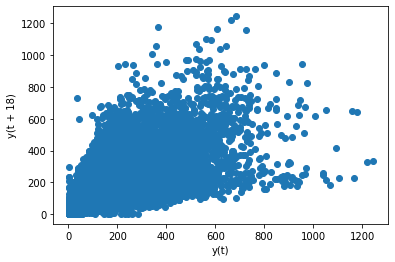

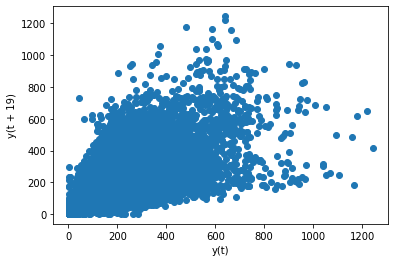

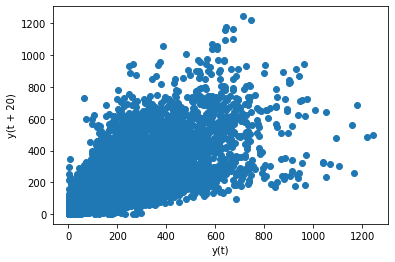

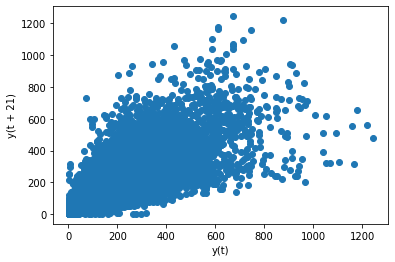

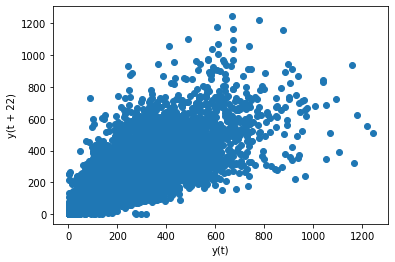

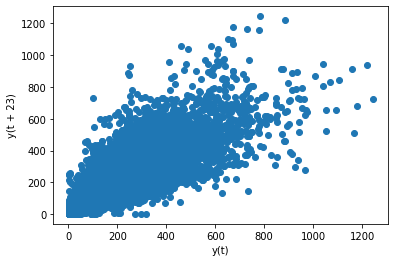

In [84]:
from pandas.plotting import lag_plot

for i in range(1, 24):
    lag_plot(data_1[['Count']],lag=i)
    plt.show()